In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
###read the csv file
newpizza=pd.read_csv('/Users/georgeli/Desktop/stat3011/Project 2/newpizzadata.csv')

In [2]:
##Find the Q1 & Q3 by numpy.quantile function
Q1=np.quantile(newpizza['average_price'],0.25)
Q3=np.quantile(newpizza['average_price'],0.75)
###define lowerlimit by Q1-1.5(IQR) and define upperlimit by Q3+1.5(IQR)
lowerlimit=Q1-1.5*(Q3-Q1)
upperlimit=Q3+1.5*(Q3-Q1)
### Print out the result by 3 decimal places.
print(f"The lowerlimit and upperlimit of average price are{round(lowerlimit,3)} and {round(upperlimit,3)}")

The lowerlimit and upperlimit of average price are-1.735 and 24.225


In [4]:
def abline(slope, intercept): ## only input the slope and intercept for the function
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim()) ### get the x limit in the plot.
    y_vals = intercept + slope * x_vals ###y=mx+c 
    plt.plot(x_vals, y_vals, '--') ###plot the line by its x value and y value.


In [5]:
c=np.repeat("NA",newpizza['average_price'].shape[0]) 
#create a "NA" data set which dimension (numbers of rows in pizza, 1)
c[(newpizza["average_price"] < upperlimit) & (newpizza["average_price"] > lowerlimit)] = "k"
###define the C data set, when the pizza price is between upperlimit and lowerlimit, the "NA" values replace to k 
###which represent black color.
c[newpizza["average_price"] > upperlimit] = "r"
c[newpizza["average_price"] < lowerlimit] = "r"
### When the data is bigger than upperlimit and smaller than lowerlimit, the 'Na' values replace to r
## which represent red color

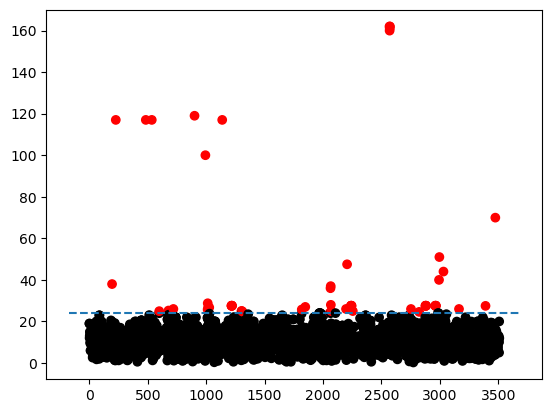

In [6]:
x=np.arange(newpizza['average_price'].shape[0])###define X variable as a vector by the column size of average_price
plt.scatter(x,newpizza['average_price'],color=c) 
###plot the data set of average price and the color =c which present the data in different color forms.
abline(0,upperlimit)
###draw a line to seperate the outliers.


In [7]:
outliers=newpizza[newpizza['average_price']>upperlimit] ###find out the number of outliers by its definition.
print(f"There are {outliers.shape[0]} outliers.")

There are 59 outliers.


In [8]:
newpizza.shape ###the dimension of data before dropping outliers

(3510, 23)

In [9]:
non_outlier_pizza=newpizza[newpizza['average_price']<upperlimit]
non_outlier_pizza.shape ### the dimension of data after drooping outliers

(3451, 23)

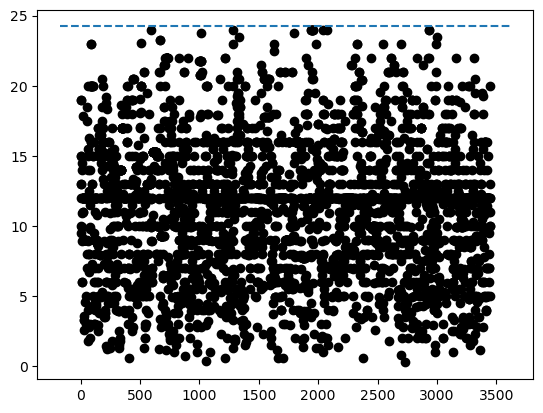

In [10]:
x2=np.arange(non_outlier_pizza['average_price'].shape[0])
###define X variable as a vector by the column size of average_price
plt.scatter(x2,non_outlier_pizza['average_price'],color="black")
#### plot the new data set which drop the outliers.
abline(0,upperlimit)  ##